In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("retail_sales.csv",parse_dates = ["date"])

In [3]:
data.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


<AxesSubplot:xlabel='date'>

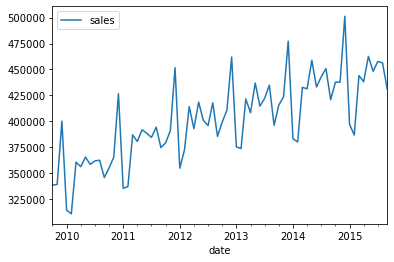

In [4]:
data.plot(x ="date" , y = "sales")

##### Auto Correlation Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

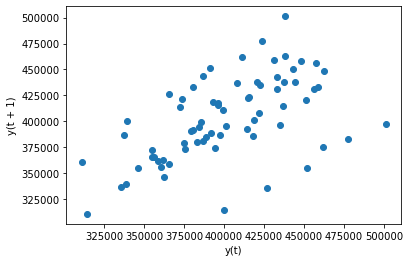

In [5]:
pd.plotting.lag_plot(data.sales)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

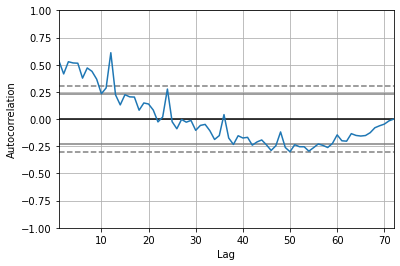

In [6]:
pd.plotting.autocorrelation_plot(data.sales)

p - > lag order -> AR (Auto Regression)

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

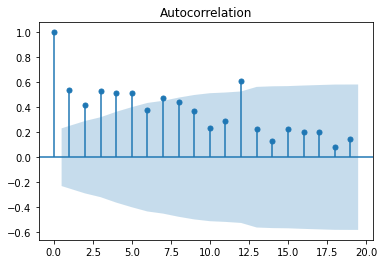

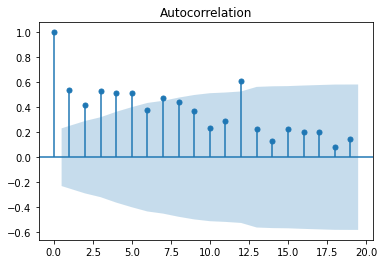

In [8]:
plot_acf(data.sales)

In [9]:
data["sales_diff"] = data.sales.diff()

<AxesSubplot:xlabel='date'>

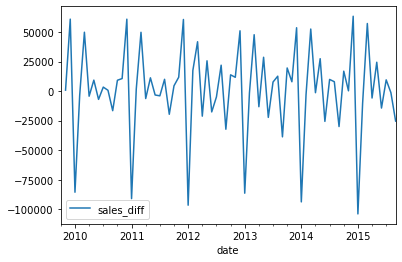

In [10]:
data.plot(x = "date", y = "sales_diff")

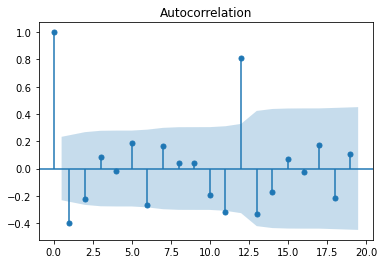

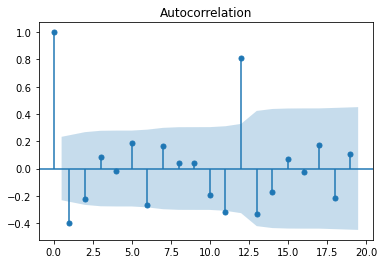

In [11]:
plot_acf(data.sales_diff.dropna())

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
data = data.set_index("date")

In [14]:
decomposition = seasonal_decompose(data["sales_diff"].dropna())

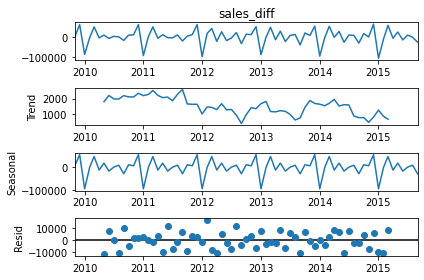

In [15]:
fig = decomposition.plot()

In [16]:
from statsmodels.tsa.ar_model import AR

In [17]:
model = AR(data.sales_diff.dropna())

C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [18]:
m = model.fit()

In [19]:
m.k_ar

11

In [20]:
predictions = m.predict(dynamic = False)

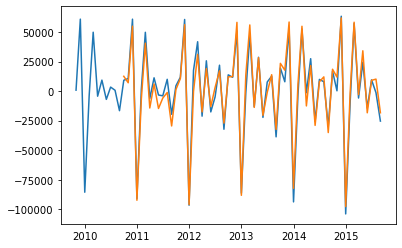

In [22]:
plt.plot(data.sales_diff)
plt.plot(predictions)